# CRYPTO DATA

In [815]:
import pandas as pd
import numpy as np
import pandas_datareader as web     #Library to import crypto data
import yfinance as yf               #Library to import crypto data
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
import plotly as plot
from plotly import graph_objs as go

import warnings
warnings.filterwarnings('ignore')

##### Initializing parameters

In [816]:
start = datetime(2021,1,1)
end = datetime(2021,10,1)
asset = 'BTC-USD'

##### Main Data

In [817]:
data = web.DataReader(asset,'yahoo', start, end)
data = data.reset_index()

##### Control Data

In [818]:
data2 = web.DataReader(asset,'yahoo', start, end= '2021-10-08')
data2 = data2.reset_index()
data2

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344
1,2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
2,2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
3,2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062
4,2021-01-05,34437.589844,30221.187500,31977.041016,33992.429688,67547324782,33992.429688
...,...,...,...,...,...,...,...
277,2021-10-05,51839.984375,49072.839844,49174.960938,51514.812500,35873904236,51514.812500
278,2021-10-06,55568.464844,50488.191406,51486.664062,55361.449219,49034730168,55361.449219
279,2021-10-07,55338.625000,53525.468750,55338.625000,53805.984375,36807860413,53805.984375
280,2021-10-08,55922.980469,53688.054688,53802.144531,53967.847656,34800873924,53967.847656


### Exploratory Data Analysis

In [819]:
data.shape

(275, 7)

In [820]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
265,2021-09-23,44942.175781,43109.339844,43560.296875,44895.097656,34244064430,44895.097656
266,2021-09-24,45080.492188,40936.558594,44894.300781,42839.750000,42839345714,42839.750000
267,2021-09-25,42996.257812,41759.921875,42840.890625,42716.593750,31604717236,42716.593750
268,2021-09-26,43919.300781,40848.460938,42721.628906,43208.539062,30661222077,43208.539062
269,2021-09-27,44313.246094,42190.632812,43234.183594,42235.730469,30980029059,42235.730469
270,2021-09-28,42775.144531,40931.664062,42200.898438,41034.542969,30214940550,41034.542969
271,2021-09-29,42545.257812,40829.667969,41064.984375,41564.363281,30602359905,41564.363281
272,2021-09-30,44092.601562,41444.582031,41551.269531,43790.894531,31141681925,43790.894531
273,2021-10-01,48436.011719,43320.023438,43816.742188,48116.941406,42850641582,48116.941406
274,2021-10-02,48282.062500,47465.496094,48137.468750,47711.488281,30614346492,47711.488281


In [821]:
close = data['Close'].values

In [822]:
#close

In [823]:
close = list(close)

#### Creating a List of consecutive 7-day values from the 'Close' Column of the Data

In [824]:
n = 7
close_n = [close[i:i+n] for i in range(0, len(close)+1-2*n)]
    
last_n = close[-n:]


# close_n = close values from first index to +7 of it. The +1 was to make it not slice the last index
# -2 x n was to remove the last 7 and also since i'm adding i+n initially it has to be 2 times.

In [825]:
last_n   #Last 7 Values

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

#### Dictionary to keep track of the values

In [826]:
Close = {}

for i in close_n:
    Close[(close_n.index(i))] = i


In [827]:
last_n

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

### Pearson's Correlation

In [828]:
from scipy.stats import pearsonr

In [829]:
vals = {}
for i in close_n:
    vals[(close_n.index(i))] = pearsonr(i,last_n)[0]

In [830]:
#vals

In [831]:
#vals.values()

In [832]:
values = vals.values()
max_value = max(values)
key_of_max_value = max(vals, key=vals.get)

In [833]:
# x = 0.95
# high = [{key: value} for key, value in vals.items() if value > x] #Returns Correlations greater than 'x'
# high

In [834]:
key_of_max_value

28

#### List containing Close Prices with high Correlation to our current (selected) session.

In [835]:
close_n[key_of_max_value]

[34316.38671875,
 34269.5234375,
 33114.359375,
 33537.17578125,
 35510.2890625,
 37472.08984375,
 36926.06640625]

In [836]:
max_value

0.9818165803951855

In [837]:
Close[key_of_max_value]

[34316.38671875,
 34269.5234375,
 33114.359375,
 33537.17578125,
 35510.2890625,
 37472.08984375,
 36926.06640625]

#### Current (selected) session.

In [838]:
last_n

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

## Values

In [839]:
past_7 = Close[key_of_max_value]   #Portion of Data (in the past) with highest Correlation with current (selected) price.  
past_result = Close[key_of_max_value+n] #The immediate Price Action after "past_7".

current_7 = last_n #Current Price we are considering
prediction = [] #Expected Price Action


In [840]:
past_7

[34316.38671875,
 34269.5234375,
 33114.359375,
 33537.17578125,
 35510.2890625,
 37472.08984375,
 36926.06640625]

In [841]:
past_result

[38144.30859375,
 39266.01171875,
 38903.44140625,
 46196.46484375,
 46481.10546875,
 44918.18359375,
 47909.33203125]

In [842]:
current_7

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

#### Prediction Generation
To generate the prediction, we used scaling factors of the relationship between the past data and result.

In [843]:
last = past_7[-1]

In [844]:
scale = []

In [845]:
for i in past_result:
    scale.append(i/last)

In [846]:
scale

[1.0329913880914703,
 1.0633683882479275,
 1.053549570599952,
 1.2510529644698607,
 1.258761357285615,
 1.21643565007908,
 1.2974393617821423]

In [847]:
last_value = current_7[-1]

In [848]:
last_value

47711.48828125

In [849]:
prediction

[]

In [850]:
for i in scale:
    prediction.append(last_value*i)

In [851]:
past_result

[38144.30859375,
 39266.01171875,
 38903.44140625,
 46196.46484375,
 46481.10546875,
 44918.18359375,
 47909.33203125]

In [852]:
prediction

[49285.55650755836,
 50734.88839454269,
 50266.41799139558,
 59689.59885352683,
 60057.37774702296,
 58037.955263642754,
 61902.76290530116]

In [853]:
data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
265,2021-09-23,44942.175781,43109.339844,43560.296875,44895.097656,34244064430,44895.097656
266,2021-09-24,45080.492188,40936.558594,44894.300781,42839.750000,42839345714,42839.750000
267,2021-09-25,42996.257812,41759.921875,42840.890625,42716.593750,31604717236,42716.593750
268,2021-09-26,43919.300781,40848.460938,42721.628906,43208.539062,30661222077,43208.539062
269,2021-09-27,44313.246094,42190.632812,43234.183594,42235.730469,30980029059,42235.730469
270,2021-09-28,42775.144531,40931.664062,42200.898438,41034.542969,30214940550,41034.542969
271,2021-09-29,42545.257812,40829.667969,41064.984375,41564.363281,30602359905,41564.363281
272,2021-09-30,44092.601562,41444.582031,41551.269531,43790.894531,31141681925,43790.894531
273,2021-10-01,48436.011719,43320.023438,43816.742188,48116.941406,42850641582,48116.941406
274,2021-10-02,48282.062500,47465.496094,48137.468750,47711.488281,30614346492,47711.488281


In [854]:
past_7

[34316.38671875,
 34269.5234375,
 33114.359375,
 33537.17578125,
 35510.2890625,
 37472.08984375,
 36926.06640625]

In [855]:
current_7

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

In [856]:
key_of_max_value

28

In [857]:
dat1 = data.iloc[key_of_max_value:key_of_max_value+7, [0,4]]
dat1

,Date,Close
28,2021-01-29,34316.386719
29,2021-01-30,34269.523438
30,2021-01-31,33114.359375
31,2021-02-01,33537.175781
32,2021-02-02,35510.289062
33,2021-02-03,37472.089844
34,2021-02-04,36926.066406


In [858]:
last_n

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

In [859]:
current_7

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

### Visualizing the Correlation

In [860]:
import seaborn as sns

<AxesSubplot:>

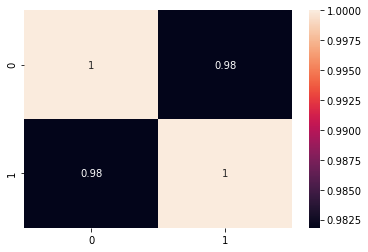

In [861]:
sns.heatmap(pd.DataFrame((Close[key_of_max_value], current_7)).transpose().corr(), annot=True)

In [862]:
past_7

[34316.38671875,
 34269.5234375,
 33114.359375,
 33537.17578125,
 35510.2890625,
 37472.08984375,
 36926.06640625]

In [863]:
data_of_past_7 = data.iloc[key_of_max_value:key_of_max_value+n, [0,4]]
data_of_past_7

,Date,Close
28,2021-01-29,34316.386719
29,2021-01-30,34269.523438
30,2021-01-31,33114.359375
31,2021-02-01,33537.175781
32,2021-02-02,35510.289062
33,2021-02-03,37472.089844
34,2021-02-04,36926.066406


In [864]:
past_result

[38144.30859375,
 39266.01171875,
 38903.44140625,
 46196.46484375,
 46481.10546875,
 44918.18359375,
 47909.33203125]

In [865]:
data_of_past_result = data.iloc[key_of_max_value+n-1:key_of_max_value+2*n, [0,4]]
data_of_past_result

,Date,Close
34,2021-02-04,36926.066406
35,2021-02-05,38144.308594
36,2021-02-06,39266.011719
37,2021-02-07,38903.441406
38,2021-02-08,46196.464844
39,2021-02-09,46481.105469
40,2021-02-10,44918.183594
41,2021-02-11,47909.332031


In [866]:
current_7_data = data.iloc[-7:, [0,4]]
current_7_data

,Date,Close
268,2021-09-26,43208.539062
269,2021-09-27,42235.730469
270,2021-09-28,41034.542969
271,2021-09-29,41564.363281
272,2021-09-30,43790.894531
273,2021-10-01,48116.941406
274,2021-10-02,47711.488281


##### Creating a Custom DateTime for the Prediction

In [867]:
pred_dates = ['2021-10-3', '2021-10-4', '2021-10-5', '2021-10-6', '2021-10-7', '2021-10-8', '2021-10-9']
pred_dates = pd.to_datetime(pred_dates)
predicted = pd.DataFrame(pred_dates, columns=['Date'])
predicted

,Date
0,2021-10-03
1,2021-10-04
2,2021-10-05
3,2021-10-06
4,2021-10-07
5,2021-10-08
6,2021-10-09


In [868]:
current_7

[43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125]

In [869]:
predicted['Close'] = prediction
predicted

,Date,Close
0,2021-10-03,49285.556508
1,2021-10-04,50734.888395
2,2021-10-05,50266.417991
3,2021-10-06,59689.598854
4,2021-10-07,60057.377747
5,2021-10-08,58037.955264
6,2021-10-09,61902.762905


##### Complete Data with needed Column (Close)

In [870]:
full_data_with_pred = pd.concat([data, predicted], ignore_index=True)
full_data_with_pred.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
272,2021-09-30,44092.601562,41444.582031,41551.269531,43790.894531,3.114168e+10,43790.894531
273,2021-10-01,48436.011719,43320.023438,43816.742188,48116.941406,4.285064e+10,48116.941406
274,2021-10-02,48282.062500,47465.496094,48137.468750,47711.488281,3.061435e+10,47711.488281
275,2021-10-03,NaN,NaN,NaN,49285.556508,NaN,NaN
276,2021-10-04,NaN,NaN,NaN,50734.888395,NaN,NaN
277,2021-10-05,NaN,NaN,NaN,50266.417991,NaN,NaN
278,2021-10-06,NaN,NaN,NaN,59689.598854,NaN,NaN
279,2021-10-07,NaN,NaN,NaN,60057.377747,NaN,NaN
280,2021-10-08,NaN,NaN,NaN,58037.955264,NaN,NaN
281,2021-10-09,NaN,NaN,NaN,61902.762905,NaN,NaN


#### Control Data to Cross Check

In [871]:
data2.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
272,2021-09-30,44092.601562,41444.582031,41551.269531,43790.894531,31141681925,43790.894531
273,2021-10-01,48436.011719,43320.023438,43816.742188,48116.941406,42850641582,48116.941406
274,2021-10-02,48282.062500,47465.496094,48137.468750,47711.488281,30614346492,47711.488281
275,2021-10-03,49130.691406,47157.289062,47680.027344,48199.953125,26638115879,48199.953125
276,2021-10-04,49456.777344,47045.003906,48208.906250,49112.902344,33383173002,49112.902344
277,2021-10-05,51839.984375,49072.839844,49174.960938,51514.812500,35873904236,51514.812500
278,2021-10-06,55568.464844,50488.191406,51486.664062,55361.449219,49034730168,55361.449219
279,2021-10-07,55338.625000,53525.468750,55338.625000,53805.984375,36807860413,53805.984375
280,2021-10-08,55922.980469,53688.054688,53802.144531,53967.847656,34800873924,53967.847656
281,2021-10-09,55397.945312,53735.144531,53929.781250,54968.222656,32491211414,54968.222656


In [872]:
predicted1 = full_data_with_pred.iloc[-n-1 : , [0,4]]
predicted1

,Date,Close
274,2021-10-02,47711.488281
275,2021-10-03,49285.556508
276,2021-10-04,50734.888395
277,2021-10-05,50266.417991
278,2021-10-06,59689.598854
279,2021-10-07,60057.377747
280,2021-10-08,58037.955264
281,2021-10-09,61902.762905


## Visualization of the Prediction

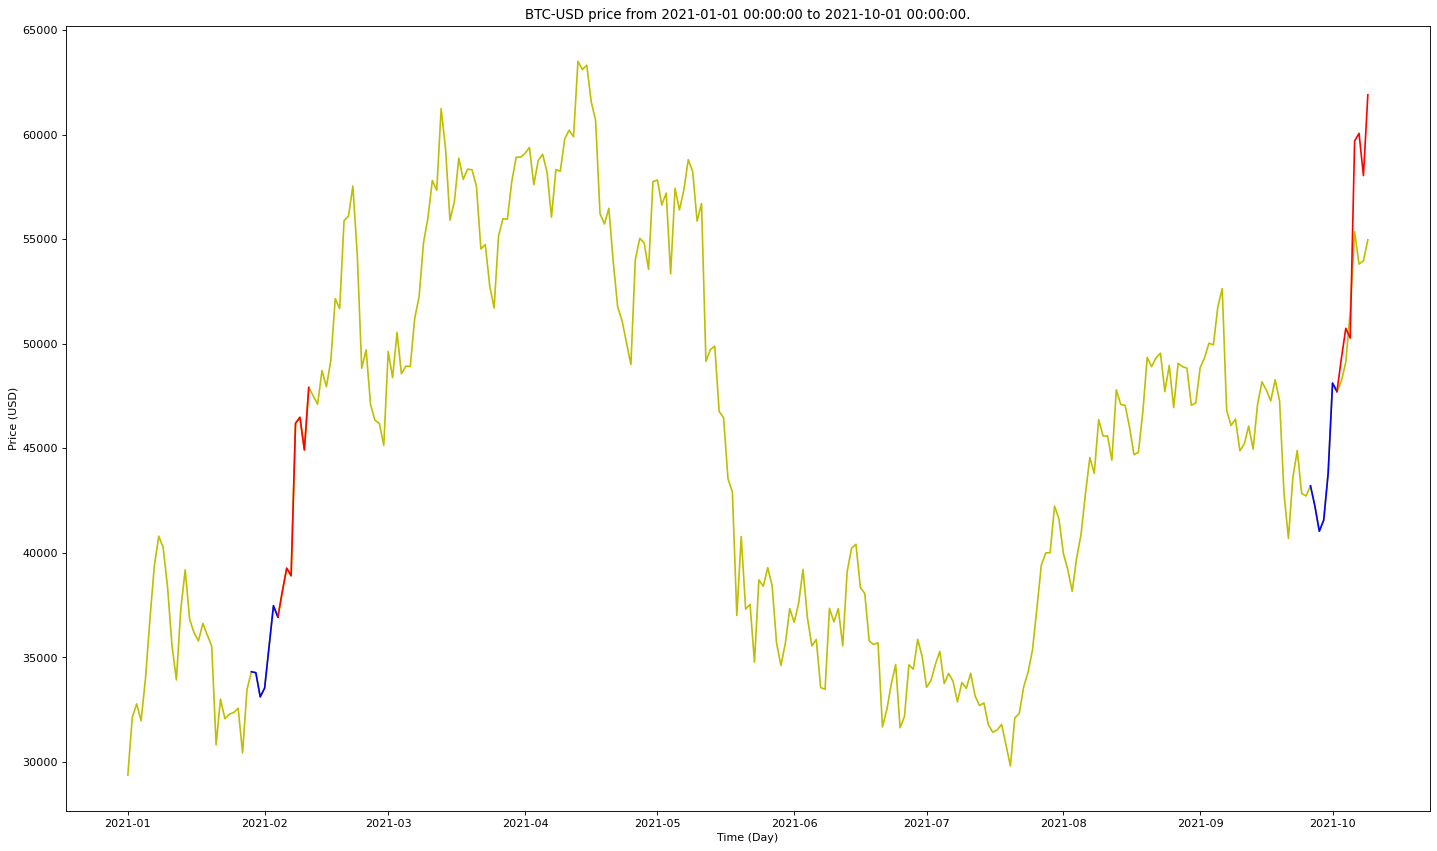

In [873]:
plt.figure(figsize=(22,13), dpi=80)

plt.plot(data2['Date'], data2['Close'], '-y') # plotting t, b separately 
#plt.plot(full_data_with_pred['Date'], full_data_with_pred['Close'], '-k') # plotting t, a separately 
plt.plot(current_7_data['Date'], current_7_data['Close'], '-b')
plt.plot(data_of_past_7['Date'], data_of_past_7['Close'], '-b')


plt.plot(data_of_past_result['Date'], data_of_past_result['Close'], '-r')
plt.plot(predicted1['Date'], predicted1['Close'], '-r')
plt.title((f"{asset} price from {start} to {end}."))
plt.xlabel("Time (Day)")
plt.ylabel("Price (USD)")
plt.show()

#### Making Candlestick Chart with Python

In [812]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'],
                                    high=data['High'],
                                    low=data['Low'],
                                    close=data['Adj Close'])])
plot.offline.plot(fig, filename='Cand.html')

'Cand.html'